In [10]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt

In [11]:
df = pd.read_csv("mail_data.csv")

In [13]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
## Data Cleaning
df.shape

(5572, 2)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [16]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [17]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [18]:
df['Category'] = df['Category'].map({'spam':1, 'ham':0})
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [19]:
df['Category'].value_counts()

Category
0    4825
1     747
Name: count, dtype: int64

In [20]:
df.duplicated().sum()

415

In [21]:
df = df.drop_duplicates(keep = 'first')

In [22]:
df.duplicated().sum()

0

In [23]:
## Data Analaysis
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

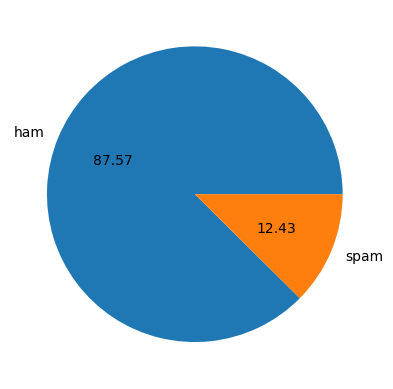

In [24]:
plt.pie(df['Category'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [25]:
## Data preprocessing

import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jayup\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayup\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
import string

def converted(text):
    ## lower case
    text = text.lower()
    
    ## Word Tokenize
    text = nltk.word_tokenize(text)
    
    ## Remove special characters    
    z = []
    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            z.append(i)
            
    return " ".join(z)

In [30]:
converted("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k?")

'gon na home soon want talk stuff anymore tonight k'

In [31]:
df['Converted_Message'] = df['Message'].apply(converted)

C:\Users\jayup\AppData\Local\Temp\ipykernel_4792\4289045051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Converted_Message'] = df['Message'].apply(converted)


In [32]:
df.head()

,Category,Message,Converted_Message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [33]:

tfidf = TfidfVectorizer(max_features = 4000)

In [34]:
X = tfidf.fit_transform(df['Converted_Message']).toarray()

In [35]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
X.shape

(5157, 4000)

In [37]:
df['Category'].values

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [38]:
y = df['Category'].values
y.shape

(5157,)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [40]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5157, 4000)
(4125, 4000)
(1032, 4000)


In [41]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5157,)
(4125,)
(1032,)


In [42]:
## Creating and training the model using LR

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver  = "liblinear", penalty = "l1")
model = LR.fit(X_train, y_train)

In [43]:
## Printing the prediction on train data

train_pred = model.predict(X_train)
print('Prediction on training data: ', train_pred)

## Printing the actual training data values
print('Actual training data values: ', y_train)

Prediction on training data:  [0 0 0 ... 0 0 0]
Actual training data values:  [0 0 0 ... 0 0 0]


In [44]:
## Evaluating the Training model

from sklearn.metrics import precision_score

print("Classification Report:", classification_report(y_train, train_pred))
print("Confusion Matrix: \n", confusion_matrix(y_train, train_pred))
print("Accuracy Score: ", accuracy_score(y_train, train_pred))
print("Precision Score: ", precision_score(y_train, train_pred))


Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98      3620
           1       0.95      0.72      0.82       505

    accuracy                           0.96      4125
   macro avg       0.96      0.86      0.90      4125
weighted avg       0.96      0.96      0.96      4125

Confusion Matrix: 
 [[3601   19]
 [ 141  364]]
Accuracy Score:  0.9612121212121212
Precision Score:  0.9503916449086162


In [45]:
## Printing the prediction on test data

test_pred = model.predict(X_test)
print('Prediction on testing data: ', test_pred)

## Printing the actual testing data values
print('Actual testing data values: ', y_test)

Prediction on testing data:  [0 1 0 ... 0 0 0]
Actual testing data values:  [0 0 0 ... 0 0 0]


In [46]:
## Evaluating the Testing model

print("Classification Report:", classification_report(y_test, test_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, test_pred))
print("Accuracy Score: ", accuracy_score(y_test, test_pred))
print("Precision Score: ", precision_score(y_test, test_pred))

lr_accuracy = accuracy_score(y_test, test_pred)
lr_precision = precision_score(y_test, test_pred)

Classification Report:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       896
           1       0.88      0.68      0.76       136

    accuracy                           0.94      1032
   macro avg       0.91      0.83      0.87      1032
weighted avg       0.94      0.94      0.94      1032

Confusion Matrix: 
 [[883  13]
 [ 44  92]]
Accuracy Score:  0.9447674418604651
Precision Score:  0.8761904761904762


In [47]:
## Creating and training the model using NB

from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
model1 = MNB.fit(X_train, y_train)

In [48]:
## Printing the prediction on train data

nb_train_pred = model1.predict(X_train)
print('Prediction on training data: ', nb_train_pred)

## Printing the actual training data values
print('Actual training data values: ', y_train)

Prediction on training data:  [0 0 0 ... 0 0 0]
Actual training data values:  [0 0 0 ... 0 0 0]


In [49]:
## Evaluating the Training model

from sklearn.metrics import precision_score

print("Classification Report:", classification_report(y_train, nb_train_pred))
print("Confusion Matrix: \n", confusion_matrix(y_train, nb_train_pred))
print("Accuracy Score: ", accuracy_score(y_train, nb_train_pred))
print("Precision Score: ", precision_score(y_train, nb_train_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3620
           1       1.00      0.81      0.89       505

    accuracy                           0.98      4125
   macro avg       0.99      0.90      0.94      4125
weighted avg       0.98      0.98      0.98      4125

Confusion Matrix: 
 [[3620    0]
 [  98  407]]
Accuracy Score:  0.9762424242424242
Precision Score:  1.0


In [50]:
## Printing the prediction on test data

nb_test_pred = model1.predict(X_test)
print('Prediction on testing data: ', nb_test_pred)

## Printing the actual testing data values
print('Actual testing data values: ', y_test)

Prediction on testing data:  [0 0 0 ... 0 0 0]
Actual testing data values:  [0 0 0 ... 0 0 0]


In [51]:
## Evaluating the Testing model

print("Classification Report:", classification_report(y_test, nb_test_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, nb_test_pred))
print("Accuracy Score: ", accuracy_score(y_test, nb_test_pred))
print("Precision Score: ", precision_score(y_test, nb_test_pred))

nb_accuracy = accuracy_score(y_test, nb_test_pred)
nb_precision = precision_score(y_test, nb_test_pred)

Classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       1.00      0.85      0.92       136

    accuracy                           0.98      1032
   macro avg       0.99      0.93      0.95      1032
weighted avg       0.98      0.98      0.98      1032

Confusion Matrix: 
 [[896   0]
 [ 20 116]]
Accuracy Score:  0.9806201550387597
Precision Score:  1.0


In [52]:
#Building and Training using SVC

from sklearn.svm import SVC
svc= SVC(kernel = "poly",gamma = 1.0)
model2 = svc.fit(X_train, y_train)

In [55]:
## Printing the prediction on train data

sv_train_pred = model2.predict(X_train)
print('Prediction on training data: ', sv_train_pred)

## Printing the actual training data values
print('Actual training data values: ', y_train)

Prediction on training data:  [0 0 0 ... 0 0 0]
Actual training data values:  [0 0 0 ... 0 0 0]


In [56]:
#Evaluating the Training Model

print("Classification Report:", classification_report(y_train, sv_train_pred))
print("Confusion Matrix: \n", confusion_matrix(y_train, sv_train_pred))
print("Accuracy Score: ", accuracy_score(y_train, sv_train_pred))
print("Precision Score: ", precision_score(y_train, sv_train_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3620
           1       1.00      1.00      1.00       505

    accuracy                           1.00      4125
   macro avg       1.00      1.00      1.00      4125
weighted avg       1.00      1.00      1.00      4125

Confusion Matrix: 
 [[3620    0]
 [   1  504]]
Accuracy Score:  0.9997575757575757
Precision Score:  1.0


In [57]:
## Printing the prediction on test data

sv_test_pred = model2.predict(X_test)
print('Prediction on training data: ', sv_test_pred)

## Printing the actual training data values
print('Actual training data values: ', y_test)

Prediction on training data:  [0 0 0 ... 0 0 0]
Actual training data values:  [0 0 0 ... 0 0 0]


In [90]:
#Evaluating the testing model

print("Classification Report:", classification_report(y_test, sv_test_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, sv_test_pred))
print("Accuracy Score: ", accuracy_score(y_test, sv_test_pred))
print("Precision Score: ", precision_score(y_test, sv_test_pred))

sv_accuracy = accuracy_score(y_test, sv_test_pred)
sv_precision = precision_score(y_test, sv_test_pred)

Classification Report:               precision    recall  f1-score   support

           0       0.92      1.00      0.96       896
           1       1.00      0.46      0.63       136

    accuracy                           0.93      1032
   macro avg       0.96      0.73      0.80      1032
weighted avg       0.93      0.93      0.92      1032

Confusion Matrix: 
 [[896   0]
 [ 73  63]]
Accuracy Score:  0.9292635658914729
Precision Score:  1.0


In [83]:
#building and training model using decision trees

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth = 2, random_state = 42)
model3 = DT.fit(X_train, y_train)

In [84]:
## Printing the prediction on train data

dt_train_pred = model3.predict(X_train)
print('Prediction on training data: ', dt_train_pred)

## Printing the actual training data values
print('Actual training data values: ', y_train)

Prediction on training data:  [0 0 0 ... 0 0 0]
Actual training data values:  [0 0 0 ... 0 0 0]


In [85]:
#Evaluating the Training Model

print("Classification Report:", classification_report(y_train, dt_train_pred))
print("Confusion Matrix: \n", confusion_matrix(y_train, dt_train_pred))
print("Accuracy Score: ", accuracy_score(y_train, dt_train_pred))
print("Precision Score: ", precision_score(y_train, dt_train_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.94      0.99      0.96      3620
           1       0.84      0.52      0.64       505

    accuracy                           0.93      4125
   macro avg       0.89      0.75      0.80      4125
weighted avg       0.92      0.93      0.92      4125

Confusion Matrix: 
 [[3571   49]
 [ 243  262]]
Accuracy Score:  0.9292121212121213
Precision Score:  0.842443729903537


In [86]:
## Printing the prediction on test data

dt_test_pred = model3.predict(X_test)
print('Prediction on training data: ', dt_test_pred)

## Printing the actual training data values
print('Actual training data values: ', y_test)

Prediction on training data:  [0 0 0 ... 0 0 0]
Actual training data values:  [0 0 0 ... 0 0 0]


In [87]:
#Evaluating the testing model

print("Classification Report:", classification_report(y_test, dt_test_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, dt_test_pred))
print("Accuracy Score: ", accuracy_score(y_test, dt_test_pred))
print("Precision Score: ", precision_score(y_test, dt_test_pred))

dt_accuracy = accuracy_score(y_test, dt_test_pred)
dt_precision = precision_score(y_test, dt_test_pred)

Classification Report:               precision    recall  f1-score   support

           0       0.93      0.98      0.96       896
           1       0.83      0.52      0.64       136

    accuracy                           0.92      1032
   macro avg       0.88      0.75      0.80      1032
weighted avg       0.92      0.92      0.91      1032

Confusion Matrix: 
 [[881  15]
 [ 65  71]]
Accuracy Score:  0.9224806201550387
Precision Score:  0.8255813953488372


In [91]:
clfs = ["Logistic Regression","Naive Bayes","Support Vector Machine","Decision Tree"]
accuracy = [lr_accuracy,  nb_accuracy, sv_accuracy, dt_accuracy]
precision = [lr_precision, nb_precision, sv_precision, dt_precision]

def function(clfs, accuracy, precision):
    for i in range(len(clfs)):
        clf_name = clfs[i]
        clf_accuracy = accuracy[i]
        clf_precision = precision[i]
        
        print("Important info for {}".format(clf_name))
        print("{} accuracy = {}".format(clf_name, accuracy[i]))
        print("{} accuracy = {}".format(clf_name, precision[i]))
        print(" ")
        
function(clfs, accuracy, precision)

Important info for Logistic Regression
Logistic Regression accuracy = 0.9447674418604651
Logistic Regression accuracy = 0.8761904761904762
 
Important info for Naive Bayes
Naive Bayes accuracy = 0.9806201550387597
Naive Bayes accuracy = 1.0
 
Important info for Support Vector Machine
Support Vector Machine accuracy = 0.9292635658914729
Support Vector Machine accuracy = 1.0
 
Important info for Decision Tree
Decision Tree accuracy = 0.9224806201550387
Decision Tree accuracy = 0.8255813953488372
 


In [ ]:
import pickle 

pickle.dumpp(tfidf, open("vectorizer.pkl","wb"))
pickle.dump(MNB, open("model.pkl","wb"))
